# House Sales in King County, USA

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

<b>id</b> : A notation for a house

<b> date</b>: Date house was sold


<b>price</b>: Price is prediction target


<b>bedrooms</b>: Number of bedrooms


<b>bathrooms</b>: Number of bathrooms

<b>sqft_living</b>: Square footage of the home

<b>sqft_lot</b>: Square footage of the lot


<b>floors</b> :Total floors (levels) in house


<b>waterfront</b> :House which has a view to a waterfront


<b>view</b>: Has been viewed


<b>condition</b> :How good the condition is overall

<b>grade</b>: overall grade given to the housing unit, based on King County grading system


<b>sqft_above</b> : Square footage of house apart from basement


<b>sqft_basement</b>: Square footage of the basement

<b>yr_built</b> : Built Year


<b>yr_renovated</b> : Year when house was renovated

<b>zipcode</b>: Zip code


<b>lat</b>: Latitude coordinate

<b>long</b>: Longitude coordinate

<b>sqft_living15</b> : Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area


<b>sqft_lot15</b> : LotSize area in 2015(implies-- some renovations)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
%matplotlib inline

# Task 1: Importing Data Sets 

 Load the csv:  

In [2]:
file_name='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/coursera/project/kc_house_data_NaN.csv'
df=pd.read_csv(file_name)

In [3]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Task 2: Preparing Data

### Data Types of the attributes

In [4]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

### Statistical Summary of the DataFrame

In [5]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Dropping "Unnamed: 0" and "id"

In [6]:
df.drop(["id", "Unnamed: 0"], axis=1, inplace=True)

In [7]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Checking Null values

In [8]:
df.isnull().sum()

date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

### Replacing null values with the mean value

In [9]:
mean = df['bedrooms'].mean()
df['bedrooms'].replace(np.nan, mean, inplace=True)

In [10]:
df['bedrooms'].isnull().sum()

0

In [11]:
mean = df['bathrooms'].mean()
df['bathrooms'].replace(np.nan, mean, inplace=True)

In [12]:
df['bathrooms'].isnull().sum()

0

In [13]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Exploratory Data Analysis

### Counting number of houses with unique values for bedrooms, bathrooms, floors and waterfront

In [14]:
print(df['bedrooms'].value_counts().to_frame())
print()
print(df['bathrooms'].value_counts().to_frame())
print()
print(df['floors'].value_counts().to_frame())
print()
print(df['waterfront'].value_counts().to_frame())

          bedrooms
3.00000       9824
4.00000       6882
2.00000       2760
5.00000       1601
6.00000        272
1.00000        199
7.00000         38
3.37287         13
8.00000         13
9.00000          6
10.00000         3
11.00000         1
33.00000         1

          bathrooms
2.500000       5380
1.000000       3852
1.750000       3048
2.250000       2047
2.000000       1930
1.500000       1446
2.750000       1185
3.000000        753
3.500000        731
3.250000        589
3.750000        155
4.000000        136
4.500000        100
4.250000         79
0.750000         72
4.750000         23
5.000000         21
5.250000         13
5.500000         10
2.115736         10
1.250000          9
6.000000          6
5.750000          4
0.500000          4
6.250000          2
6.500000          2
6.750000          2
8.000000          2
7.500000          1
7.750000          1

     floors
1.0   10680
2.0    8241
1.5    1910
3.0     613
2.5     161
3.5       8

   waterfront
0       21450

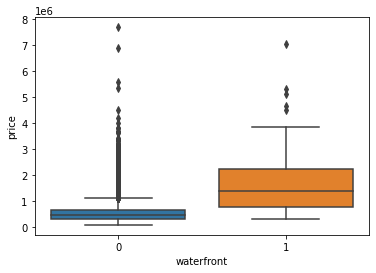

In [15]:
sns.boxplot(x="waterfront", y="price", data=df)

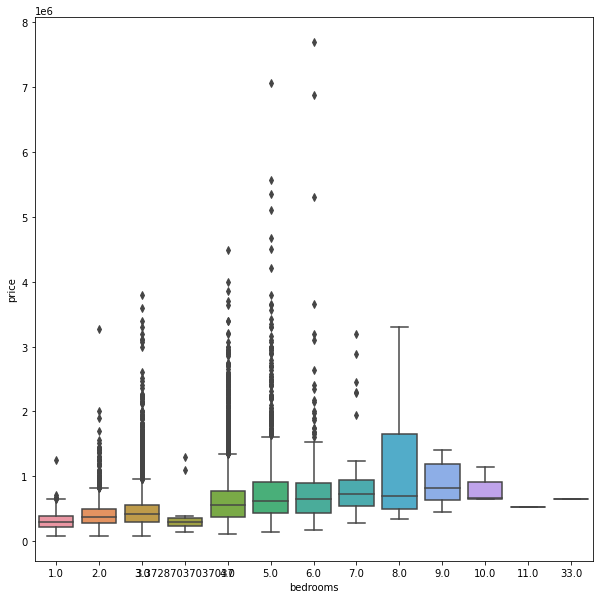

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
sns.boxplot(x="bedrooms", y="price", data=df)

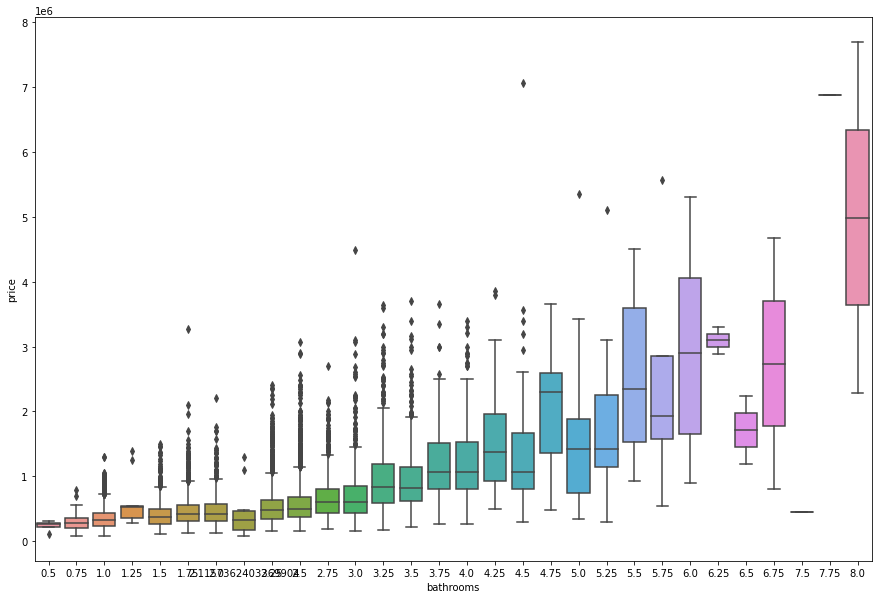

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.boxplot(x="bathrooms", y="price", data=df)

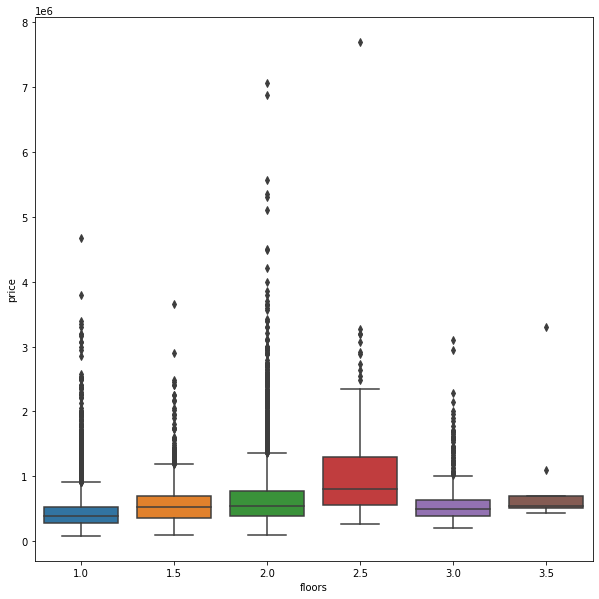

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
sns.boxplot(x="floors", y="price", data=df)

#### Before Renovating

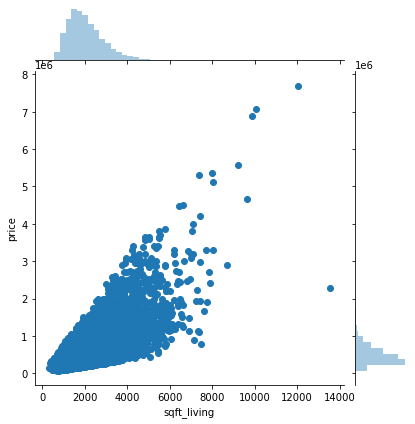

In [19]:
sns.jointplot(x = "sqft_living", y = "price", data = df)

#### After Renovating

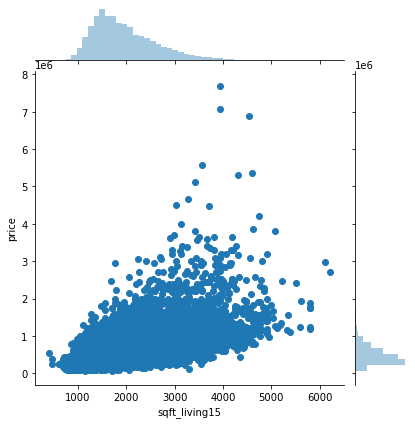

In [20]:
sns.jointplot(x = "sqft_living15", y = "price", data = df)

#### Before Renovating

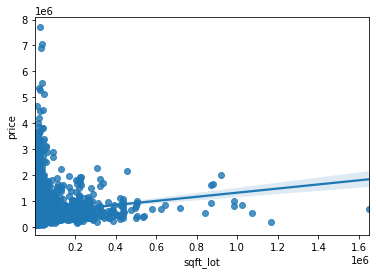

In [21]:
sns.regplot(x = "sqft_lot", y = "price", data = df)

#### After Renovating

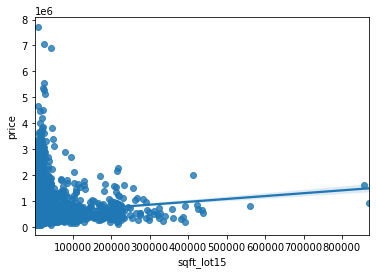

In [22]:
sns.regplot(x = "sqft_lot15", y = "price", data = df)

[Text(0.5, 0, 'price'),
 Text(1.5, 0, 'bedrooms'),
 Text(2.5, 0, 'bathrooms'),
 Text(3.5, 0, 'sqft_living'),
 Text(4.5, 0, 'sqft_lot'),
 Text(5.5, 0, 'floors'),
 Text(6.5, 0, 'waterfront'),
 Text(7.5, 0, 'view'),
 Text(8.5, 0, 'condition'),
 Text(9.5, 0, 'grade'),
 Text(10.5, 0, 'sqft_above'),
 Text(11.5, 0, 'sqft_basement'),
 Text(12.5, 0, 'yr_built'),
 Text(13.5, 0, 'yr_renovated'),
 Text(14.5, 0, 'zipcode'),
 Text(15.5, 0, 'lat'),
 Text(16.5, 0, 'long'),
 Text(17.5, 0, 'sqft_living15'),
 Text(18.5, 0, 'sqft_lot15')]

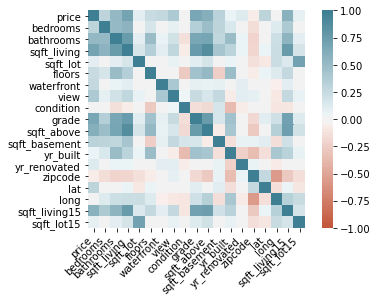

In [23]:
corrMatrix = df.corr()
ax = sns.heatmap(corrMatrix,
                vmin=-1, vmax=1, center=0,
                cmap=sns.diverging_palette(20,220,n=200),
                square=True)
ax.set_xticklabels(ax.get_xticklabels(),
                  rotation=45,
                  horizontalalignment='right')

In [24]:
df.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

### Train-test split

In [25]:
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
            'floors', 'waterfront', 'view', 'condition', 'grade',
            'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
            'sqft_living15', 'sqft_lot15', 'zipcode', 'lat', 'long']

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [27]:
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=1)
print("Number of Training Samples: ", x_train.shape[0])
print("Number of Testing Samples: ", x_test.shape[0])

Number of Training Samples:  17290
Number of Testing Samples:  4323


# Task 3: Modeling

## Model with all Features

In [28]:
lr = LinearRegression()

In [29]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
lr.score(x_train, y_train)

0.7037425710302684

In [31]:
lr.score(x_test, y_test)

0.6858281382574225

In [32]:
lr.coef_

array([-3.20157004e+04,  3.65145443e+04,  1.06184032e+02,  1.32192149e-01,
        1.00840629e+04,  5.38914567e+05,  5.19783525e+04,  2.76221955e+04,
        9.55030575e+04,  6.85996246e+01,  3.75844069e+01, -2.51972498e+03,
        2.10128903e+01,  2.13202184e+01, -3.45530506e-01, -5.49442688e+02,
        6.10132907e+05, -2.06626133e+05])

In [33]:
lr.intercept_

3900641.136675313

In [34]:
y_pred = lr.predict(x_test)

In [35]:
r2_score(y_pred, y_test)

0.45031739256964

Try

In [36]:
from sklearn.decomposition import PCA

In [37]:
x_train_new = PCA(n_components=1).fit_transform(x_train)
x_test_new = PCA(n_components=1).fit_transform(x_test)

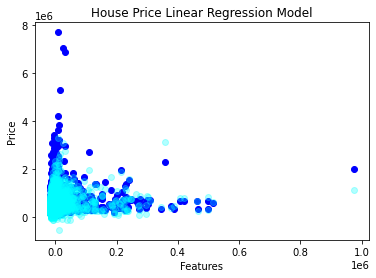

In [38]:
plt.scatter(x_test_new, y_test, color = "blue")
plt.scatter(x_test_new, y_pred, color = "cyan", alpha = 0.3)
plt.title("House Price Linear Regression Model")
plt.xlabel("Features")
plt.ylabel("Price")
plt.show()

In [39]:
from sklearn.metrics import accuracy_score, classification_report

In [40]:
y_pred

array([ 640166.11341005,  476863.37433896,  707424.3593907 , ...,
        360357.42520065, 1387211.84669785,  367896.73332452])

In [41]:
y_test

15544     459000.0
17454     445000.0
21548    1057000.0
3427      732350.0
8809      235000.0
           ...    
13597     965000.0
9648      359950.0
18627     260000.0
9553     1795000.0
14200     418000.0
Name: price, Length: 4323, dtype: float64

In [42]:
#classification_report(y_test, y_pred)

# Feature Reduced Model

In [43]:
df.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

In [44]:
features1 = ['floors', 'bedrooms','lat', 'sqft_basement','view', 
            'bathrooms', 'sqft_living15', 'sqft_above',
             'grade', 'sqft_living']

In [45]:
X = df[features1]
Y = df['price']

In [46]:

#X =X.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=1)

print("Number of Training Samples: ", x_train.shape[0])
print("Number of Testing Samples: ", x_test.shape[0])

Number of Training Samples:  17290
Number of Testing Samples:  4323


In [47]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
lr.score(x_train, y_train)

0.6448217130794828

In [49]:
lr.score(x_test, y_test)

0.6276529669033131

In [50]:
lr.coef_

array([-2.41256108e+04, -2.61845128e+04,  6.72385733e+05,  6.10261581e+01,
        9.20750107e+04, -7.25327921e+03,  1.82337718e+00,  6.58842455e+01,
        8.02724316e+04,  1.26910403e+02])

In [51]:
lr.intercept_

-32339318.58272753

In [52]:
y_pred = lr.predict(x_test)

In [53]:
r2_score(y_pred, y_test)

0.2878330227403936

In [54]:
x_train_new = PCA(n_components=1).fit_transform(x_train)
x_test_new = PCA(n_components=1).fit_transform(x_test)

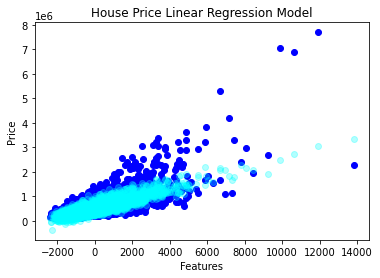

In [55]:
plt.scatter(x_test_new, y_test, color = "blue")
plt.scatter(x_test_new, y_pred, color = "cyan", alpha=0.3)
plt.title("House Price Linear Regression Model")
plt.xlabel("Features")
plt.ylabel("Price")
plt.show()